<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220528ch3_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 딥러닝 텐서플로 
ch3. 1-4 pg. 50-95

# 01. 딥러닝 준비
## 1-1. 주요 용어
### 1-1-1. 하이퍼 파라미터
* 사용자가 직접 설정해주는 설정 값
  * weights나 bias처럼 자동으로 업데이트되는 값이 아닌, 학습 속도나 반복 훈련 횟수 등을 일컫음
  * 튜닝한다고 표현

### 1-1-2. 과소적합vs과대적합
* 훈련 데이터를 반복학습하면서 예측데이터가 다른 분포를 갖거나, 학습 데이터가 특정 레이블에 편향된 데이터로 이루어져 있을 때
* 과소적합: 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어짐.
* 과대적합: 지나치게 반복학습해 노이즈까지 반영되어 예측성능은 좋지만 오차가 발생

### 1-1-3. 에포크
* 딥러닝 모델이 반복 훈련할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 loop

### 1-1-4. 손실함수
* 예측 값과 정답 값의 차이 또는 오차
  * 사용자가 정의해야 함.(분류/회귀 모델에 따라 다르게 적용)
* 지도학습의 분류 문제
  * 이진 분류: *binary_crossentropy* 사용, *activation function이 sigmoid*인 경우
  * 다중 분류: *categorical_crossentropy* 사용, one-hot vector 클래스 대상일 경우, *activation function이 softmax*인 경우
* 회귀 모델
  * mean squared error
  * mean absoluted error
  * huber

In [2]:
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
#tf.keras.losses.binary_crossentropy()

### 1-1-5. 경사하강법
: 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

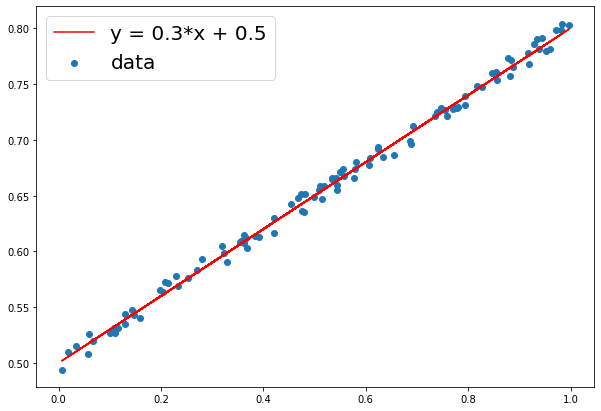

w: 0.3, b: 0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터 셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape) #노이즈 추가
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [4]:
# 최대 반복 횟수
num_epoch = 1000

# 학습율 (learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # Hypothesis 정의
    y_hat = w * x + b
    
    # Loss Function 정의
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break
    # Gradient 미분 계산
    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.58081, b = 0.59986 error = 26.98242
 5 w = 0.44623, b = 0.41920 error = 0.09334
10 w = 0.42470, b = 0.43004 error = 0.06826
15 w = 0.40676, b = 0.44019 error = 0.05043
20 w = 0.39142, b = 0.44887 error = 0.03737
25 w = 0.37828, b = 0.45631 error = 0.02781
30 w = 0.36705, b = 0.46267 error = 0.02080
35 w = 0.35743, b = 0.46811 error = 0.01568
40 w = 0.34920, b = 0.47277 error = 0.01192
45 w = 0.34216, b = 0.47675 error = 0.00917
50 w = 0.33613, b = 0.48016 error = 0.00716
55 w = 0.33097, b = 0.48308 error = 0.00568
------------------------------------------------------------
58 w = 0.3, b = 0.5 error = 0.00499


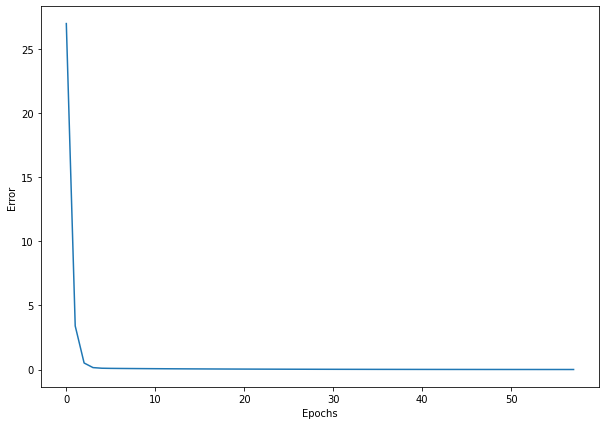

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## 1-2. 딥러닝 프로세스
### 1-2-1. 데이터 전처리
* 배열의 차원 변경/스케일 조정 등을 거쳐 데이터 가공

### 1-2-2. 모델 생성
* 모델의 구조를 정의하고 생성
  * 순차적 구조: *Sequential API*
  * 다중 입력 및 출력 구조: *Functional API* or *Model Subclassing*

### 1-2-3. 모델 컴파일
* 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 정의
  * 모델 인스턴스에 *compile()* 메소드 적용

### 1-2-4. 모델 훈련
* *fit()* 함수에 모델 훈련에 필요한 정보를 매개변수로 전달

### 1-2-5. 모델 검증
* 훈련 시 사용하지 않은 test를 모델에 입력해 predict 값을 정답과 비교해 평가지표 계산, 반복

### 1-2-6. 모델 예측


# 02. 단순 신경망 훈련
## 2-1. 선형회귀
* 텐서플로 케라스를 활용해 단순선형회귀 모델 만들고 딥러닝 진행
  * y = wx + b (w: weights, b: bias)

## 2-2. 뉴런
* node라고도 불림.
  * 여러개 layer 가지며 1개의 layer는 1개 이상의 뉴런으로 구성
  * 뉴런 내부에 가중치 존재, 모델이 훈련 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트

## 2-3. Dense 레이어
* 심층 신경망 모델을 구성하는 가장 기본 레이어
  * 레이어끼리 모든 뉴런이 연결되어 있어 완전 연결층이라고도 불림.

In [6]:
#10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

## 2-4. 데이터셋 만들기

In [7]:
import numpy as np

# 순차적 샘플 데이터셋 생성
x = np.arange(1, 6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


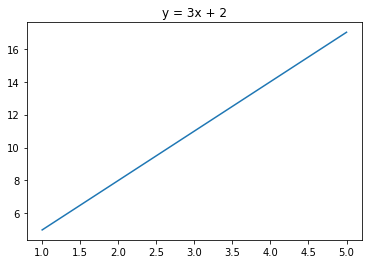

In [8]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

## 2-5. Sequential API
* 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식, 입력부터 출력 레이어까지 순서를 갖음

### 2-5-1. 모델 구조
* 1. 리스트형 정의로 sequential 클래스 함수에 파이썬 리스트 형태로 여러 층 입력하는 방식
  * '[ ]' 안에 쉼표로 구분해 층을 쌓고 순차적 처리
* 2. add 함수로 반복적으로 레이어 추가해 sequential 클래스 만든 후 생성된 모델 인스턴스에 층을 추가하는 방식

In [9]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

In [10]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

### 2-5-2. 입력 데이터 형태
* sequential 사용시 반드시 첫 층은 input_shape 매개변수를 지정해야 함.(데이터셋의 shape을 tuple or list로 지정 가능)

In [11]:
model = tf.keras.Sequential([
    # 입력 데이터의 shape = (150, 4) 인 경우 input_shape 지정 
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

### 2-5-3. 단순선형회귀 모델 정의
* 만들기 위해 1개의 뉴런 가지는 dense 레이어 한 개 사용
  * 정의한 뉴런은 w와 b를 매개변수로 가짐
  * *input_shape=* : 입력변수 개수

In [12]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])                    
])

## 2-6. 모델 요약
* *model_summary()*: 모델의 구조, 층별 노드의 개수, 훈련 시 업데이트할 파라미터 개수(Trainable params) 표기

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 2-7. 컴파일
* optimizer, loss, metrics 정의
  * 1. 클래스 인스턴스 - 학습률, 모멘텀 지정
  * 2. 함수 
  * 3. 사전 정의된 문자열 - 기본값 하이퍼파라미터, 수정 어려움

로 정의

In [14]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [15]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [16]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

## 2-8. 훈련
* weight tensor를 업데이트한다는 의미
* fit(): 입력(x), 출력(y), 반복훈련할 epoch수 지정, *verbose=0*: 훈련중간과정출력X

In [ ]:
# 훈련 - epochs=5는 충분하지 않음(과소적합)
history = model.fit(x, y, epochs=1200) #history: epoch별 훈련 손실과 평가지표가 딕셔너리 형태로 저장

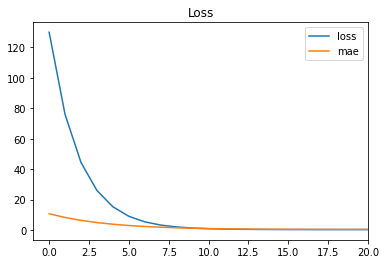

In [18]:
import matplotlib.pyplot as plt

# 20 에포크까지 Loss 수렴에 대한 시각화 - 10epoch까지 손실이 급격히 감소, 후에는 속도 느려짐
plt.plot(history.history['loss'], label='loss') 
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

## 2-9. 검증
* 보통 *evaluate()*에 검증 데이터셋 입력
  * 아래에서는 훈련 데이터셋 x,y 입력

In [19]:
model.evaluate(x, y)

1/1 [==============================] - 0s 320ms/step - loss: 6.6902e-05 - mae: 0.0070


[6.690175359835848e-05, 0.007020473480224609]

## 2-10. 예측
* predict() 메소드에 새로운 입력 데이터

In [20]:
model.predict([10])

array([[32.03393]], dtype=float32)

# 03. 심층 신경망으로 이미지 분류
## 3-1. 케라스 내장 데이터셋 로드
* boston_housing
* cifar10
* cifar100
* mnist
* fashion_mnist
* imdb
* reuters

  * 훈련 데이터셋과 검증 데이터셋 구분해 tuple로 제공

In [21]:
# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

In [22]:
# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


(데이터셋의 크기, 이미지 세로 픽셀, 이미지 가로 픽셀)

1차원 벡터 형태

In [23]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


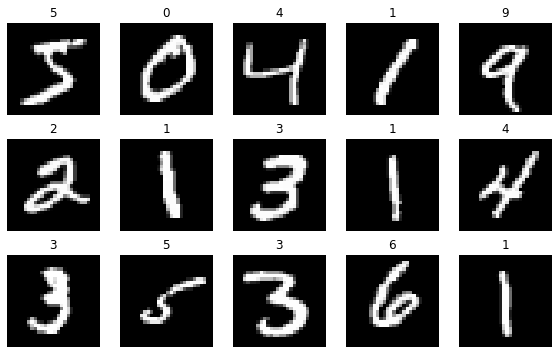

In [24]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

## 3-2. 데이터 전처리
* 정규화를 통해 데이터 범위 조정, 배열의 원소는 이미지 구성하는 하나의 픽셀값과 일대일 대응

In [25]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [26]:
# 픽셀 값의 최소/최대 값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대 값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [27]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [28]:
# 변환 후 x_train 배열의 데이터 확인 -0~1
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

## 3-3. Flatten 레이어

dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 하기 때문에 이미지 데이터를 1차원으로 변환해야 함.

In [29]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [30]:
print(f'변경전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


## 3-4. 활성화 함수
* 입력을 비선형 출력으로 변환/추가해주는 함수
  * *sigmoid*, *hyperbolic tangent/tanh*, *ReLU*, *Leaky ReLU*

In [31]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [32]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

## 3-5. 입력과 출력
* 입력) input_shape 지정
* 출력) 출력층의 노드 개수 = 분류해야 할 클래스 개수
  * 2개 이상일 경우 softmax 활성화 함수 적용(다중 분류)
  * 이진 분류&1개-sigmoid

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    # 노드=10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'), 
])

In [34]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

## 3-6. 손실함수
* 이진 분류기
  * 활성화 함수: *activation = 'sigmoid'*
  * 손실함수: *binary_crossentropy*
* 출력층 노드 2개 이상일 경우
  * 활성화 함수: *activation = 'softmax'*
  * 손실함수: *categorical_crossentropy* or *sparse_categorial_crossentropy*
* 출력데이터 y가 원핫 벡터인 경우
  * 손실함수: *categorical_crossentropy*
* 출력데이터 y가 원핫 벡터가 아닌 경우
  * 손실함수: *sparse_categorial_crossentropy*

In [35]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid 인 경우)
model.compile(loss='binary_crossentropy')

In [36]:
# 출력 노드가 2개 이상, softmax 활성화 함수를 적용한 경우

# y가 원 핫 벡터인 경우
# [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]
model.compile(loss='categorical_crossentropy')

# y가 원 핫 벡터가 아닌경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

## 3-7. 옵티마이저
* 손실을 낮추기 위해 신경망의 가중치와 학습률과 같은 신경망 속성을 변경하는 데 사용되는 최적화 방법
  * SGD, **Adam**, Adagard, Nadam, RMSprop, Adadelta, Adamax, Ftrl
* 클래스 인스턴스로 지정(학습률과 같은 하이퍼파라미터 설정가능)하거나 문자열로 지정(클래스 이름 소문자로)

In [37]:
# 클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## 3-8. 평가지표(metrics)
* accuracy, auc, precision, recall
* compile() 메소드의 metrics 속성에 평가지표 설정

In [38]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

In [39]:
# 문자열로 지정
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## 3-9. 훈련
* validation_data 매개변수에 tuple 형식의 검증 셋 지정(매 epoch마다 훈련 손실, 검증 손실, 평가지표 출력)

In [40]:
model.fit(x_train, y_train, 
          # 검증셋 지정
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2247 - accuracy: 0.9326 - val_loss: 0.1389 - val_accuracy: 0.9577
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0918 - accuracy: 0.9720 - val_loss: 0.0883 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0651 - accuracy: 0.9799 - val_loss: 0.0841 - val_accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0818 - val_accuracy: 0.9757
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0887 - val_accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0331 - accuracy: 0.9891 - val_loss: 0.0734 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0994 - val_acc

## 3-10. 평가
* evaluate(): 손실과 정확도

In [41]:
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0889 - accuracy: 0.9813
검증셋 정확도: 0.9812999963760376


## 3-11. 예측
* predict() 사용
  * 여기서는 준비되지 않아 검증 데이터셋의 입력 데이터 사용
  * 마지막 출력층의 노드 개수가 10개로 지정되어 10개 출력 후 argmax 이용해 가장 높은 확률값 가지는 클래스 결과 확인

In [42]:
predictions = model.predict(x_test)
# 예측 결과 출력
predictions[0]

array([9.2632035e-09, 5.7325888e-08, 1.7463597e-06, 2.3083685e-05,
       6.8553924e-10, 7.5952612e-11, 2.4629754e-12, 9.9997270e-01,
       4.4815636e-09, 2.3260905e-06], dtype=float32)

In [43]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


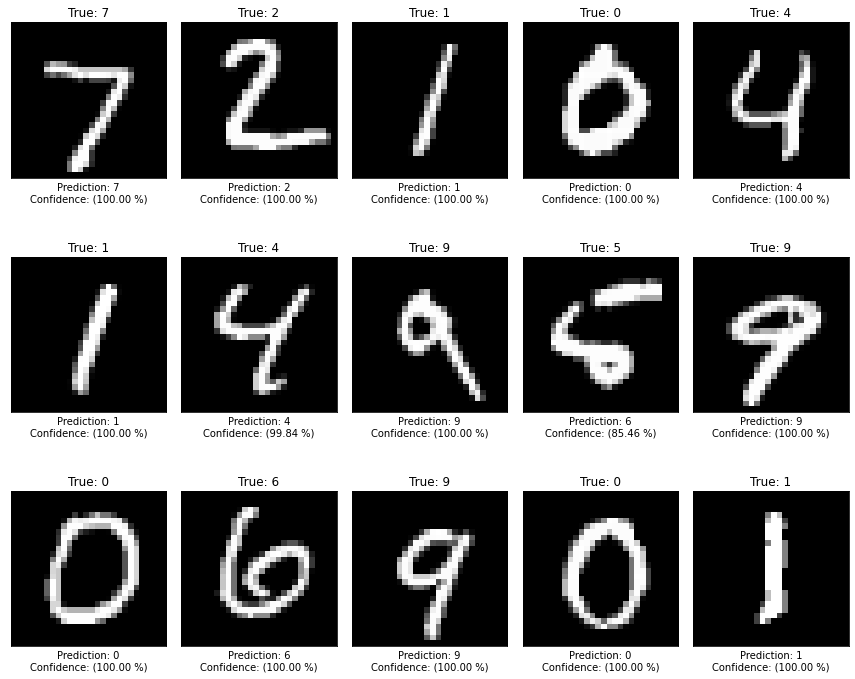

In [44]:
# 데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    # imshow로 이미지 시각화
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

# 04. 모델 세부 설정

In [45]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋을 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋을 로드 합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max() # max: 255
x_test = x_test / x_test.max() # max: 255

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


## 4-1. 초기화
* dense 레이어는 Glorot Uniform 초기화 방법 설정
  * kernel_initializer 매개변수에 설정해 초기화 방법은 HeNormal로 변경

In [46]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [47]:
# he normal 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [48]:
# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

## 4-2. 규제
* L1, L2 규제 지원, kernel_regularizer에 규제 지정

In [49]:
# 기본 값
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_23',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [50]:
# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


## 4-3. 드랍아웃
* 2014 발표 논문, 과대적합 문제
  * 노드의 일부 신호를 임의로 삭제해 과대적합 방지(학습하는 가중치 파라미터의 개수 현저히 줄어듦)
  * 예측 시에는 모든 노드 활용

In [51]:
# Dropout 25% 비율 적용 (25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)

## 4-4. 배치 정규화
* 2015년, 각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일을 정규화-다음 층으로 데이터 전달 전 스케일 조정해 안정적이고 성능 향상

In [52]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

## 4-5. 활성화 함수
* Dense에 ReLU 적용하는 것 제외한 다른 함수

In [54]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [55]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화 적용
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2 적용
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [56]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2939 - accuracy: 0.9143 - val_loss: 0.1584 - val_accuracy: 0.9525
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1351 - accuracy: 0.9594 - val_loss: 0.1119 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0983 - accuracy: 0.9694 - val_loss: 0.1065 - val_accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.0965 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9797 - val_loss: 0.0897 - val_accuracy: 0.9729
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9822 - val_loss: 0.1034 - val_accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0979 - val_accuracy

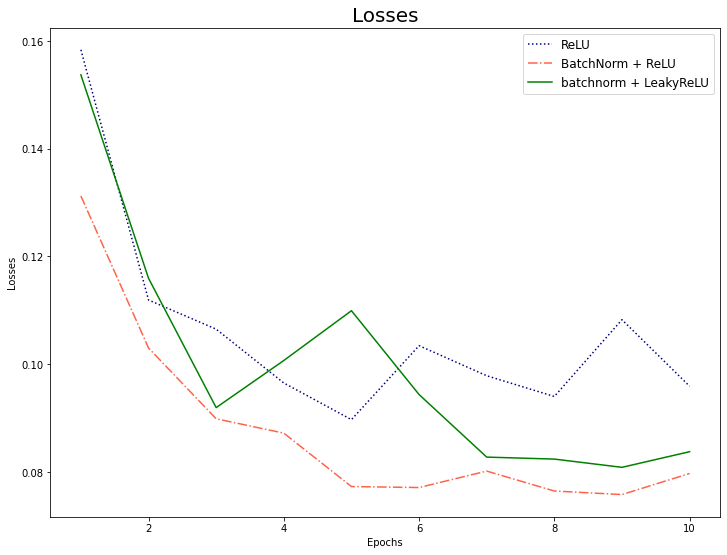

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()